In [28]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
sp=pd.read_csv('hello.csv')

In [30]:
sp.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [31]:
sp.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [32]:
sp.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [33]:
sp['Date'].value_counts()


2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

<AxesSubplot:>

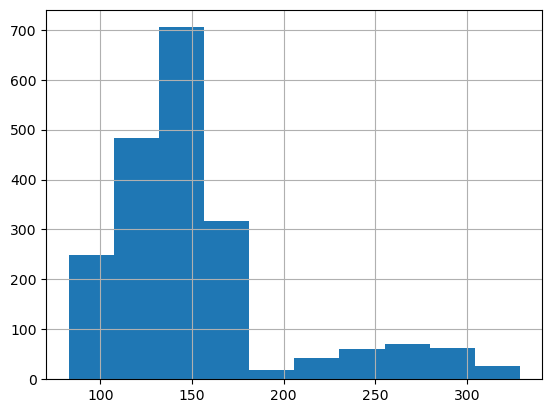

In [34]:
sp['High'].hist()

<AxesSubplot:>

<Figure size 2000x800 with 0 Axes>

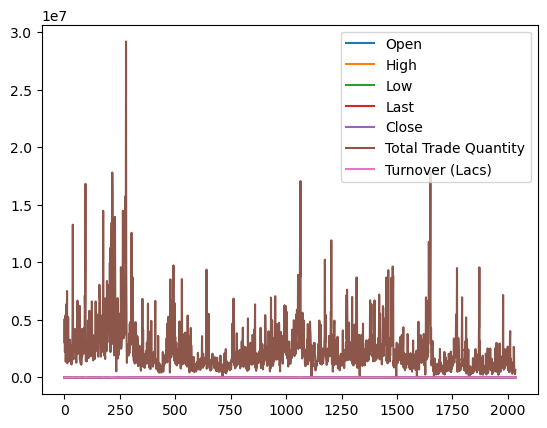

In [35]:
plt.figure(figsize=(20,8))
sp.plot()

In [37]:
da=sp.filter(['Close'])
das= da.values
tr_data_len=math.ceil(len(sp)*8)
tr_data_len

16280

In [38]:
das

array([[233.75],
       [233.25],
       [234.25],
       ...,
       [120.65],
       [120.9 ],
       [121.55]])

In [40]:
sp= sp.iloc[:, 0:5]
sp

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [41]:
tr_set = sp.iloc[:,1:2].values
tr_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [42]:
#scalling of data set

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

data_tr_scaled = scaler.fit_transform(tr_set)

In [45]:
ft_set = []
lals = []
for i in range(60, 586):
    ft_set.append(data_tr_scaled[i-60:i, 0])
    lals.append(data_tr_scaled[i, 0])

In [46]:
ft_set, lals = np.array(ft_set), np.array(lals)


In [47]:
fts_set = np.reshape(ft_set, (ft_set.shape[0], ft_set.shape[1], 1))
fts_set.shape

(526, 60, 1)

In [48]:
#building lstm 

In [55]:
pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 9.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2
Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [59]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM

In [60]:
model = Sequential()
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(ft_set, lals, epochs = 50, batch_size = 20)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 877us/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 982us/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 777us/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 659us/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 620us/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 588us/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 952us/step - loss: 0.0118
Epoch 13/50
27/27 [================

In [62]:
dt_testing_complete = pd.read_csv('hello.csv')
dt_testing_processed = dt_testing_complete.iloc[:, 1:2]
dt_testing_processed

,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


In [63]:
#prediction of data

In [65]:
dt_total = pd.concat((sp['Open'], sp['Open']), axis=0)
tet_inputs = dt_total[len(dt_total) - len(sp) - 60:].values
tet_inputs.shape

(2095,)

In [69]:
tet_inputs = tet_inputs.reshape(-1,1)
tet_inputs = scaler.transform(tet_inputs)
tet_features = []
for i in range(60, 89):
    tet_features.append(tet_inputs[i-60:i, 0])
tet_features = np.array(tet_features)
tet_features = np.reshape(tet_features, (tet_features.shape[0], tet_features.shape[1], 1))
tet_features.shape

(29, 60, 1)

In [71]:
pred = model.predict(tet_features)
pred

array([[[-0.3280373 ],
        [-0.32799456],
        [-0.32799456],
        ...,
        [-0.32820338],
        [-0.32822806],
        [-0.32819846]],

       [[-0.32799456],
        [-0.32799456],
        [-0.32799044],
        ...,
        [-0.32822806],
        [-0.32819846],
        [-0.3263575 ]],

       [[-0.32799456],
        [-0.32799044],
        [-0.32806692],
        ...,
        [-0.32819846],
        [-0.3263575 ],
        [-0.3263493 ]],

       ...,

       [[-0.32817954],
        [-0.32819188],
        [-0.32816392],
        ...,
        [-0.32635012],
        [-0.32625476],
        [-0.32614622]],

       [[-0.32819188],
        [-0.32816392],
        [-0.32820585],
        ...,
        [-0.32625476],
        [-0.32614622],
        [-0.3261939 ]],

       [[-0.32816392],
        [-0.32820585],
        [-0.32828233],
        ...,
        [-0.32614622],
        [-0.3261939 ],
        [-0.32624653]]], dtype=float32)

In [72]:
x_tr = sp[0:1256]
y_tr = sp[1:1257]
print(x_tr.shape)
print(y_tr.shape)

(1256, 5)
(1256, 5)


In [73]:
x_tr

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
1251,2013-09-04,142.00,145.35,140.65,143.60
1252,2013-09-03,144.10,145.20,140.70,141.80
1253,2013-09-02,139.40,144.40,139.35,144.00
1254,2013-08-30,138.10,140.65,136.70,139.20


In [74]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

In [75]:
#DRAW A SINGLE NUMBER FROM THE NORMAL DISTRIBUTION

In [76]:
np.random.normal(1)


0.7506296245225899

In [77]:
#DRAW 5 NUMBERS FROM THE NORMAL DISTRIBUTION

In [78]:
np.random.normal(5)


6.4621079370449745

In [79]:
np.random.seed(42)
np.random.normal(size = 1000, scale = 100).std()

97.87262077473541

In [80]:
#plotting the result

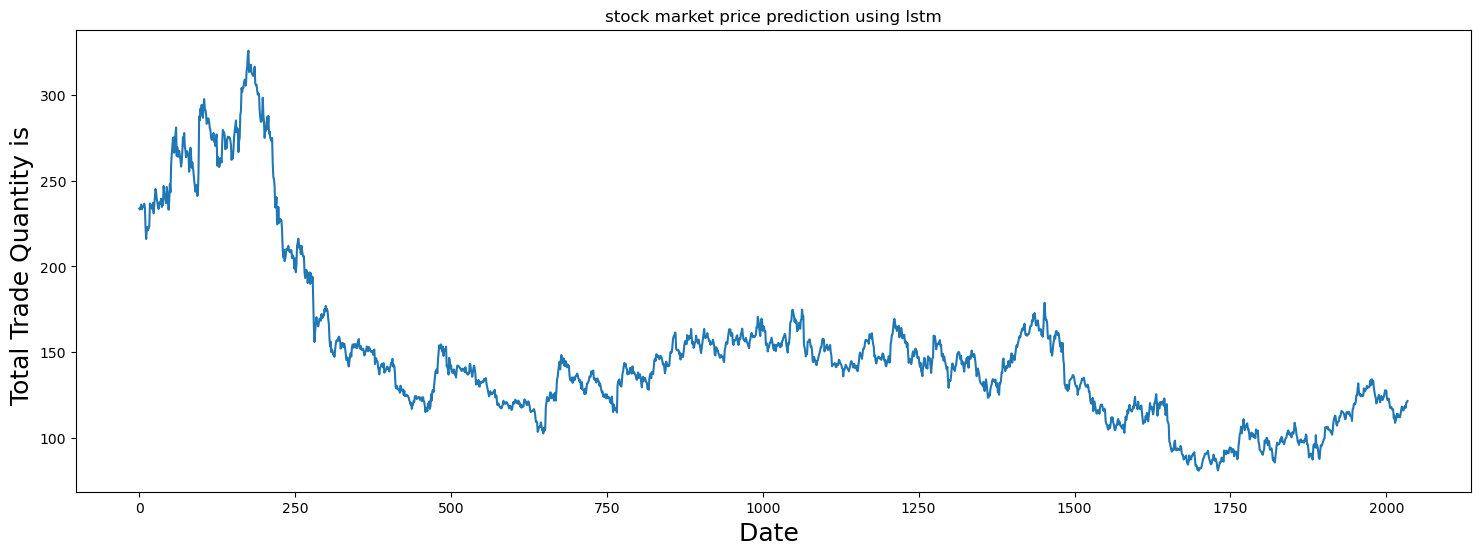

In [82]:
plt.figure(figsize=(18,6))
plt.title("stock market price prediction using lstm")
plt.plot(dt_testing_complete['Close'])
plt.xlabel('Date ',fontsize=18)
plt.ylabel('Total Trade Quantity is ',fontsize=18)
plt.show()

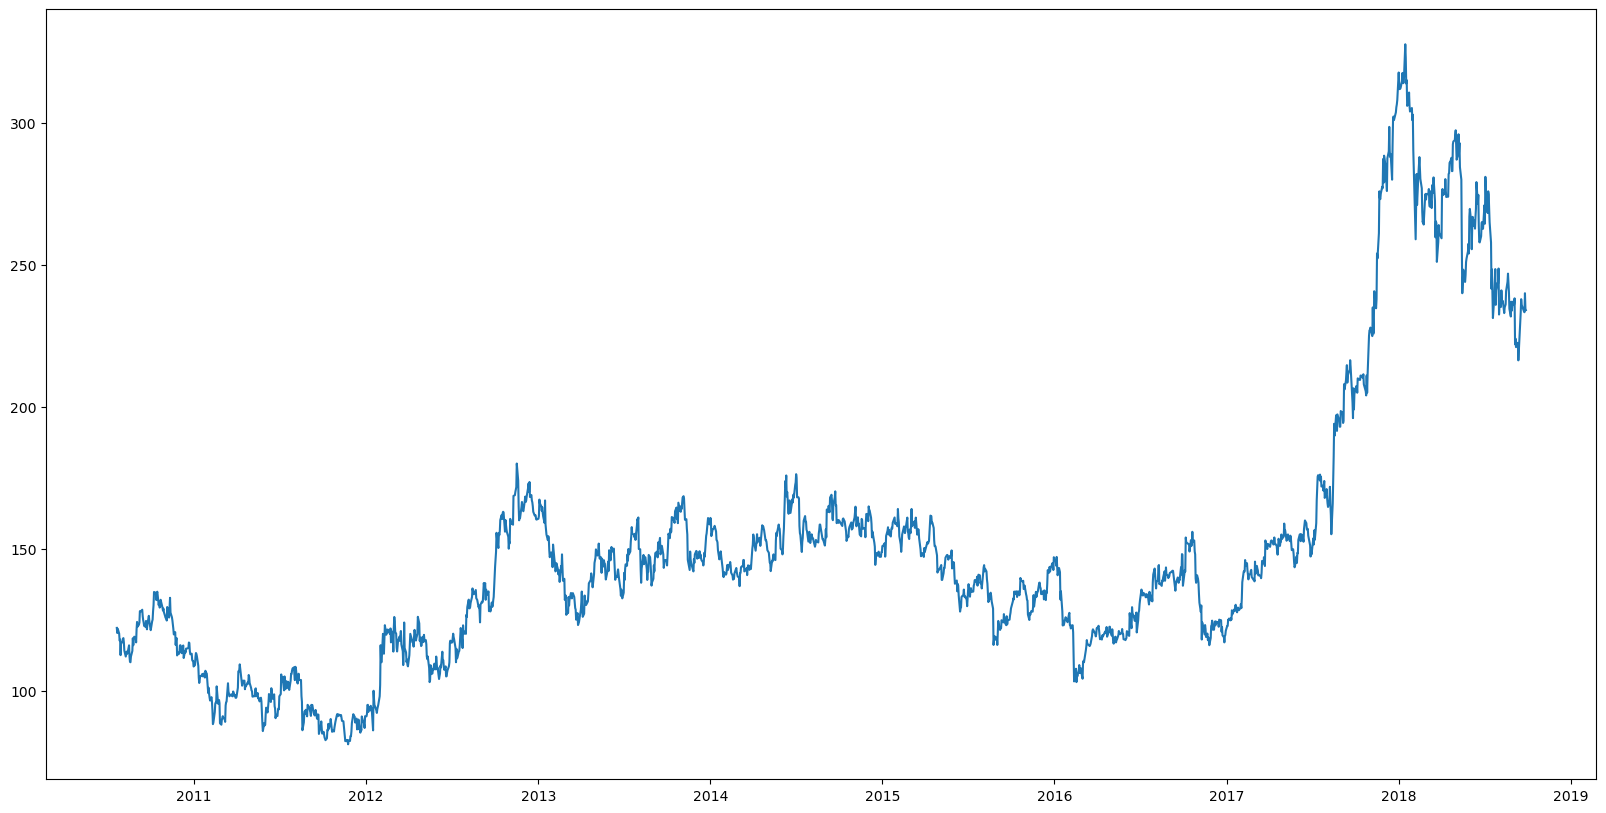

In [83]:
sp["Date"]=pd.to_datetime(sp.Date)
sp.index=sp['Date']

plt.figure(figsize=(20,10))
plt.plot(sp["Open"],label='ClosePriceHist')

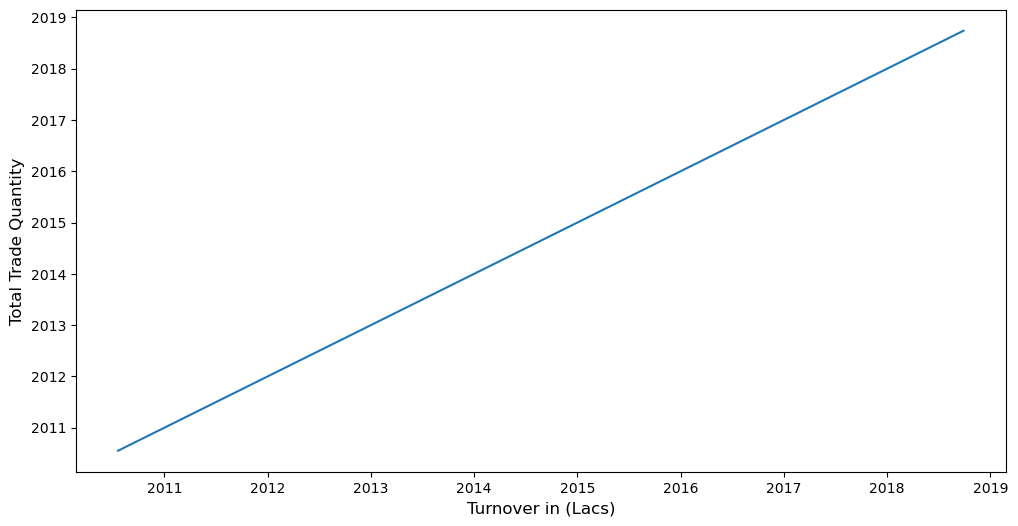

In [86]:
plt.figure(figsize=(12,6))
plt.plot(sp['Date'])
plt.xlabel('Turnover in (Lacs)',fontsize=12)
plt.ylabel('Total Trade Quantity',fontsize=12)
plt.show()